<a href="https://colab.research.google.com/github/nagendraputhane/pythonLibs/blob/master/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy

In [0]:
import numpy as np

## Creating arrays

In [0]:
a = np.zeros(5)
a

array([0., 0., 0., 0., 0.])

In [0]:
a = np.zeros((3, 4)) #rank 2
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [0]:
a.shape #tuple of axis lengths

(3, 4)

In [0]:
a.ndim

2

In [0]:
a.size

12

In [0]:
a = np.zeros((2, 3, 4)) #3D array
a

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [0]:
type(a)

numpy.ndarray

In [0]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [0]:
np.full((3, 4), np.pi) #initializes ndarray

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [0]:
np.empty((2, 3)) #uninitialized

array([[1., 1., 1.],
       [1., 1., 1.]])

In [0]:
np.array([[1, 2], [10, 20]]) #using python array

array([[ 1,  2],
       [10, 20]])

range function

In [0]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [0]:
np.arange(1, 5)

array([1, 2, 3, 4])

In [0]:
np.arange(1.0, 5.0, .5) #with floats and step parameter

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

linspace function - evenly spaced samples

In [0]:
print(np.arange(0, 5/3, 0.333333334))

[0.         0.33333333 0.66666667 1.         1.33333334]


In [0]:
print(np.linspace(0, 5/3, 6))

[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]


rand and randn - initialize with random values.

In [0]:
np.random.rand(3, 4) #random floates between 0 and 1

array([[0.59484529, 0.32434166, 0.47216913, 0.73512397],
       [0.86818929, 0.7759155 , 0.22275842, 0.86999631],
       [0.85124565, 0.0577755 , 0.05130526, 0.08085722]])

In [0]:
np.random.randn(3, 4) #random floates sampled from a univariate normal distribution (symmetric about the mean) of mean 0 and variance 1

array([[-0.21114455,  1.52311574,  1.35810813,  1.82231431],
       [-0.35615656,  1.6142434 , -0.81112821,  1.89170834],
       [-1.34582461,  0.93988355,  0.45218832, -1.90476911]])

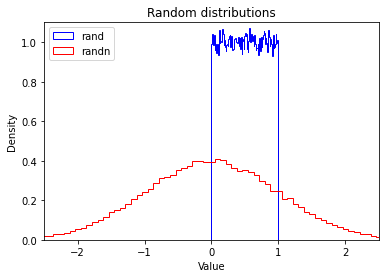

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

fromfunction - initialize an ndarray using a function

In [0]:
def my_function(x, y):
    return x*y

np.fromfunction(my_function, (2, 2))

array([[0., 0.],
       [1., 1.]])

## Array data

In [0]:
c = np.arange(5, dtype = np.float64) #set data type explicitly
print(c)
print(c.dtype) #data type
print(c.itemsize) #size of each item

[0. 1. 2. 3. 4.]
float64
8


## Reshaping an array

In [0]:
g = np.arange(24)
print(g)
print("Rank :", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank : 1


In [0]:
g.shape = (2, 3, 4) #In place (array's size must remain the same)
print(g)
print("Rank :", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank : 3


In [0]:
g2 = g.reshape(4, 6) #returns ndarray object pointing at the saame data
g2[1, 2] = 999
print(g, "\n", g2)

[[[  0   1   2   3]
  [  4   5 999   7]
  [999   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]] 
 [[  0   1   2   3   4   5]
 [999   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


In [0]:
g2.ravel() #returns 1D ndarray that points to the same data

array([  0,   1,   2,   3,   4,   5, 999,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

## Arithmetic operations
- arithmetic operators - +, -, /, *, %, etc..

In [0]:
a = np.array([10, 20])
b = np.array([2, 3])
print(a*b) #* is not matrix multiplication

[20 60]


## Broadcasting
When numpy doesnt get some shape array, it applies broadcasting rules. If the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.

In [0]:
h = np.arange(6).reshape(2, 3)
print(h.shape, h)

(2, 3) [[0 1 2]
 [3 4 5]]


In [0]:
i = np.arange(3)
print(i.shape, i)

(3,) [0 1 2]


In [0]:
j = h + i
print(j.shape, j)

(2, 3) [[0 2 4]
 [3 5 7]]


Upcasting - When combinig arrays with different dtypes, MunPy will upcast.

In [0]:
h = np.arange(5)
i = np.arange(5, dtype=float)
j = h + i
print(j.dtype)

float64


Conditional operators : applied elementwise

In [0]:
m = np.array([0, 1, 2, 3, 4, 5])
m < [2, 2, 2, 2, 2, 2]

array([ True,  True, False, False, False, False])

In [0]:
m < 25

array([ True,  True,  True,  True,  True,  True])

In [0]:
m[m<3] #boolean indexing

array([0, 1, 2])

## Mathematical and statistical functions


In [0]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
  print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.084835843520964
var = 25.855555555555554


In [0]:
c = np.arange(6).reshape(2, 3)
c

array([[0, 1, 2],
       [3, 4, 5]])

In [0]:
c.sum(axis = 0) #sum across rows

array([3, 5, 7])

In [0]:
c.sum(axis = 1) #sum across columns

array([ 3, 12])

In [0]:
c.sum(axis = (0,1))

15

## Universal functions

In [0]:
a = np.arange(6).reshape(2, 3)
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, 
             np.isnan, np.cos):
  print(func.__name__, "\n", func(a))

[[0 1 2]
 [3 4 5]]
absolute 
 [[0 1 2]
 [3 4 5]]
sqrt 
 [[0.         1.         1.41421356]
 [1.73205081 2.         2.23606798]]
exp 
 [[  1.           2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003 148.4131591 ]]
log 
 [[      -inf 0.         0.69314718]
 [1.09861229 1.38629436 1.60943791]]
sign 
 [[0 1 1]
 [1 1 1]]
ceil 
 [[0. 1. 2.]
 [3. 4. 5.]]
modf 
 (array([[0., 0., 0.],
       [0., 0., 0.]]), array([[0., 1., 2.],
       [3., 4., 5.]]))
isnan 
 [[False False False]
 [False False False]]
cos 
 [[ 1.          0.54030231 -0.41614684]
 [-0.9899925  -0.65364362  0.28366219]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Binary ufuncs

In [0]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)

array([ 3,  6,  2, 11])

In [0]:
np.greater(a, b)

array([False, False,  True, False])

In [0]:
np.maximum(a, b)

array([2, 8, 3, 7])

## Array Indexing

### One-dimensional arrays

In [2]:
a = np.array([1, 8, 3, 9, 2, 4, 18])
a[3]

9

In [3]:
a[2:5]

array([3, 9, 2])

In [4]:
a[2:-1] #doesn't consider the last element

array([3, 9, 2, 4])

In [5]:
a[:2]

array([1, 8])

In [7]:
a[2::2] #step count of 2

array([ 3,  2, 18])

In [8]:
a[::-1] #in reverse order

array([18,  4,  2,  9,  3,  8,  1])

In [9]:
a[3] = 999 #assign
a

array([  1,   8,   3, 999,   2,   4,  18])

In [11]:
a[2:4] = [888, 999] 
a

array([  1,   8, 888, 999,   2,   4,  18])

Differences with regular python arrays

In [13]:
a[2:5] = -1 #because of broadcasting, even if you assign a single value to an ndarray slice, it is copied across the whole slice
a

array([ 1,  8, -1, -1, -1,  4, 18])

In [14]:
try:
  a[2:5] = [5, 6, 7, 8, 9]
except ValueError as e:
  print(e)

cannot copy sequence with size 5 to array axis with dimension 3


In [15]:
try:
  del a[2:5]
except ValueError as e:
  print(e)

cannot delete array elements


In [16]:
a_slice = a[2:5] #slices are actually views on the same data buffer
a_slice[1] = 500
a

array([  1,   8,  -1, 500,  -1,   4,  18])

In [17]:
another_slice_a = a[2:6].copy() #copy() method to make a copy of the data
another_slice_a[1] = 600
a 

array([  1,   8,  -1, 500,  -1,   4,  18])

### Multi-dimensional arrays

In [18]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [19]:
b[1, 2]

14

In [20]:
b[1, :] #row 1, all columns of shape (12,)

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [21]:
b[:, 1] #all rows, column 1

array([ 1, 13, 25, 37])

In [22]:
b[1:2, :] #returns the row as a 2D array of shape(1, 12)

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [25]:
b[(0, 2), 2:5] #rows 0 and 2, columns 2 to 4

array([[ 2,  3,  4],
       [26, 27, 28]])

In [27]:
b[:, (-1, 2, -1)] #all rows of columns last, 2 and last

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

### Higher Dimensions

In [28]:
c = b.reshape(4, 2, 6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [29]:
c[2, 1, 4] #matrix 2, row 1, column 4

34

In [30]:
c[2, :, 3] #matrix 2, all rows, column 3

array([27, 33])

In [31]:
c[2, 1] #matrix 2, all of row 1

array([30, 31, 32, 33, 34, 35])

Ellipsis (...) -> non-specified axes be entirely added

In [32]:
c[2, ...] #matrix 2, all rows and columns

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [33]:
c[..., 3] #all matrices, all rows, column 3

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

Boolean indexing

In [37]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [35]:
rows_on = np.array([True, False, True, True])
b[rows_on, :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [38]:
cols_on = np.array([False, True, False, True] * 3)
b[:, cols_on]

array([[ 1,  3,  5,  7,  9, 11],
       [13, 15, 17, 19, 21, 23],
       [25, 27, 29, 31, 33, 35],
       [37, 39, 41, 43, 45, 47]])

np.ix_

In [39]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  3,  5,  7,  9, 11],
       [25, 27, 29, 31, 33, 35],
       [37, 39, 41, 43, 45, 47]])

In [40]:
b[b % 7 == 0] #1D array containing all the values that are true

array([ 0,  7, 14, 21, 28, 35, 42])

## Iterating
Iterating over arrays is done with respect to the first axis.

In [41]:
c = np.arange(24).reshape(2, 3, 4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [42]:
for m in c:
  print("Item:")
  print(m)

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [44]:
for i in range(len(c)): #len(c) == c.shape[0]
  print("Item:")
  print(c[i])

Item:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Item:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [45]:
for i in c.flat:
  print("Item:", i)

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


## Stacking arrays
Stack together different arrays

In [46]:
q1 = np.full((3, 4), 1.0)
q1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [47]:
q2 = np.full((4, 4), 2.0)
q2

array([[2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.]])

In [48]:
q3 = np.full((3, 4), 3.0)
q3

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

vstack - stack arrays vertically

In [49]:
q4 = np.vstack((q1, q2, q3))
q4

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [50]:
q4.shape

(10, 4)

hstack - stack arrays horizontally

In [51]:
q5 = np.hstack((q1, q3))
q5

array([[1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.],
       [1., 1., 1., 1., 3., 3., 3., 3.]])

In [52]:
q5.shape

(3, 8)

In [53]:
try:
  np.hstack((q1, q2, q3))
except ValueError as e:
  print(e)

all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 4


concatenate - stacks arrays along any given existing axis

In [54]:
q6 = np.concatenate((q1, q2, q3), axis = 0)
q6

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

stack - stacks arrays along a new axis. All arrays have to have the same shape.

In [56]:
q7 = np.stack((q1, q3))
q7

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]])

## Splitting arrays

In [57]:
r = np.arange(24).reshape(6, 4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [0]:
r1, r2, r3 = np.vsplit(r, 3) #split vertically

In [59]:
r1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [60]:
r4, r5 = np.hsplit(r, 2) #split horizontally
r4

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17],
       [20, 21]])